# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [144]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [145]:
from importlib import reload
from scripts.classifiers import neural_net

# Перезагрузка модуля neural_net
reload(neural_net)

# Импорт функции KNearestNeighbor после перезагрузки модуля
from scripts.classifiers.neural_net import TwoLayerNet

In [146]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [147]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [148]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [149]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


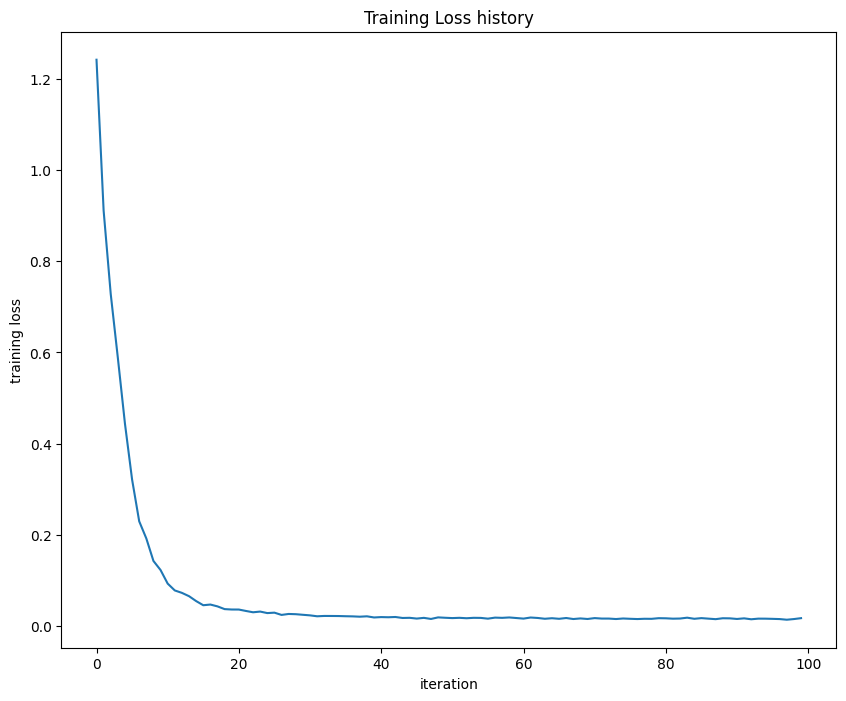

In [150]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [156]:
from importlib import reload
from scripts.classifiers import neural_net

# Перезагрузка модуля neural_net
reload(neural_net)

# Импорт функции neural_net после перезагрузки модуля
from scripts.classifiers.neural_net import TwoLayerNet

In [157]:
import os
import pickle
import numpy as np

# Путь к директории с данными CIFAR-10
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

# Функция для загрузки данных из файла
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data['data'], np.array(data['labels'])

# Загрузка обучающих данных
X_train = []
y_train = []
for i in range(1, 6):
    file_path = os.path.join(cifar10_dir, f'data_batch_{i}')
    data, labels = load_data(file_path)
    X_train.append(data)
    y_train.extend(labels)
X_train = np.concatenate(X_train)
y_train = np.array(y_train)

# Загрузка тестовых данных
file_path = os.path.join(cifar10_dir, 'test_batch')
X_test, y_test = load_data(file_path)

# Преобразование данных в нужный формат
X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')
X_test = X_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')

# Нормализация данных
X_train /= 255.0
X_test /= 255.0

# Вычитание среднего
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image

# Разделение тестовых данных на тестовую и валидационную выборки
X_val, X_test = X_test[:5000], X_test[5000:]
y_val, y_test = y_test[:5000], y_test[5000:]

In [158]:
# Изменение формы входных данных
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Обновление размера входных данных
input_size = X_train.shape[1]

num_classes = 10


# Создание и обучение модели с обновлёнными параметрами
hidden_size = 512  # Увеличение размера скрытого слоя
num_iters = 4000   # Количество итераций
learning_rate = 1e-2  # Увеличенная скорость обучения
reg_strength = 5e-4   # Уменьшенная сила регуляризации

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
                  num_iters=num_iters, batch_size=200,
                  learning_rate=learning_rate, learning_rate_decay=0.95,
                  reg=reg_strength, verbose=True)

# Оценка точности на валидационных данных
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 4000: loss 2.302593
iteration 100 / 4000: loss 2.302523
iteration 200 / 4000: loss 2.302655
iteration 300 / 4000: loss 2.302448
iteration 400 / 4000: loss 2.302737
iteration 500 / 4000: loss 2.302556
iteration 600 / 4000: loss 2.302016
iteration 700 / 4000: loss 2.301782
iteration 800 / 4000: loss 2.300166
iteration 900 / 4000: loss 2.298077
iteration 1000 / 4000: loss 2.290015
iteration 1100 / 4000: loss 2.279754
iteration 1200 / 4000: loss 2.271459
iteration 1300 / 4000: loss 2.233342
iteration 1400 / 4000: loss 2.234747
iteration 1500 / 4000: loss 2.190025
iteration 1600 / 4000: loss 2.136504
iteration 1700 / 4000: loss 2.151427
iteration 1800 / 4000: loss 2.178736
iteration 1900 / 4000: loss 2.123072
iteration 2000 / 4000: loss 2.115917
iteration 2100 / 4000: loss 2.152925
iteration 2200 / 4000: loss 2.057047
iteration 2300 / 4000: loss 2.060097
iteration 2400 / 4000: loss 2.040669
iteration 2500 / 4000: loss 2.037729
iteration 2600 / 4000: loss 2.084460
iteration 270

Параметры метода **train:**

*num_iters:* количество итераций обучения.

*batch_size:* размер мини-пакета для стохастического градиентного спуска.

*learning_rate:* скорость обучения для оптимизации.

*learning_rate_decay:* коэффициент уменьшения скорости обучения после каждой эпохи.

*reg:* коэффициент регуляризации для борьбы с переобучением.

*verbose:* если True, выводит информацию о процессе обучения.

Различные значения гиперпараметров, чтобы увеличить точность на валидационной выборке. Изменения могут включать:

Увеличение или уменьшение learning_rate.

Изменение reg для регуляризации.

Изменение num_iters и batch_size.

Добавление методов регуляризации, таких как Dropout или Batch Normalization.

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

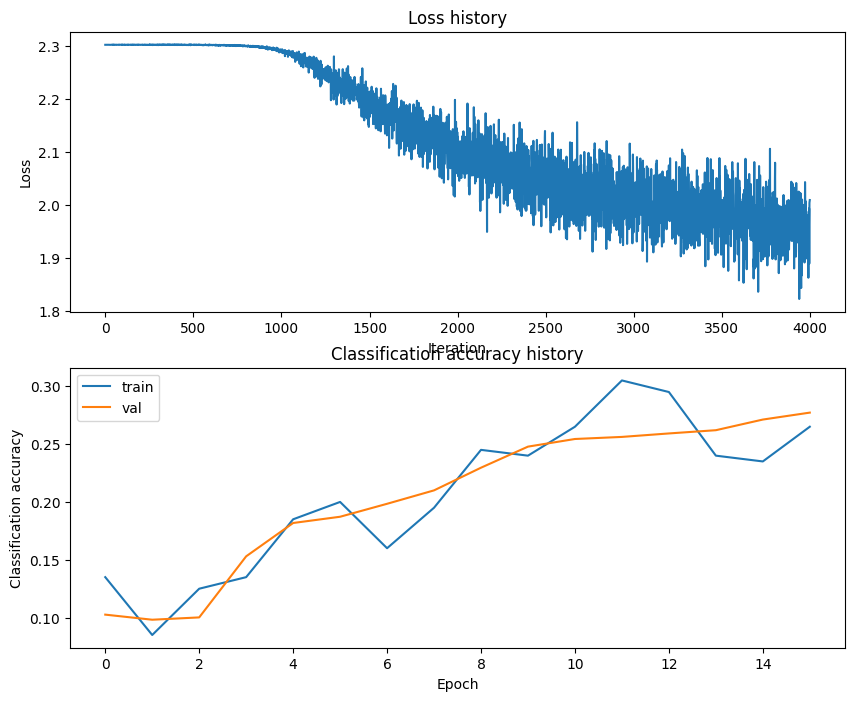

In [159]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

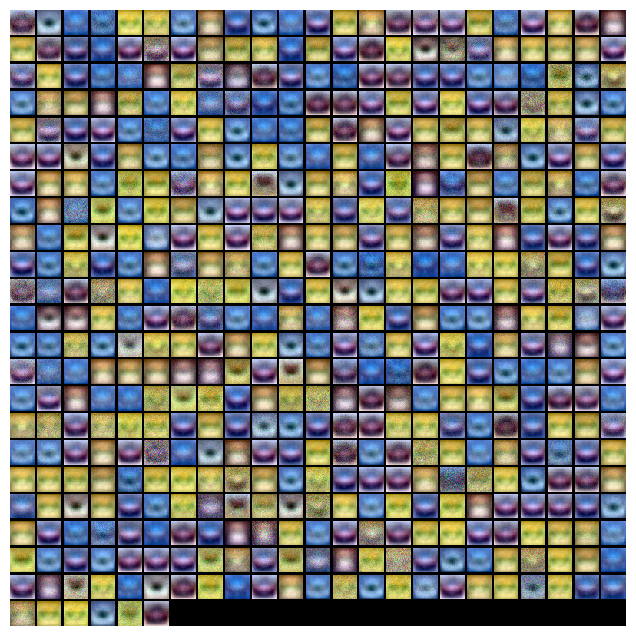

In [160]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [155]:
best_val_acc = 0
best_params = {}

# Перебор значений гиперпараметров
hidden_sizes = [256, 512, 1024]
learning_rates = [1e-2] # , 1e-3, 1e-4]
reg_strengths = [1e-4, 5e-4, 1e-3]
num_iters = 5000
verbose = False

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for reg_strength in reg_strengths:
            print(f"Hidden size: {hidden_size}, Learning rate: {learning_rate}, Reg strength: {reg_strength}")

            net = TwoLayerNet(input_size, hidden_size, num_classes)

            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=num_iters, batch_size=200,
                              learning_rate=learning_rate, learning_rate_decay=0.95,
                              reg=reg_strength, verbose=verbose)

            val_acc = (net.predict(X_val) == y_val).mean()
            print(f"Validation accuracy: {val_acc}")

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {
                    'hidden_size': hidden_size,
                    'learning_rate': learning_rate,
                    'reg_strength': reg_strength
                }

            # Построение графиков потерь и точности каждые 1000 итераций
            if verbose and num_iters % 1000 == 0:
                plt.subplot(2, 1, 1)
                plt.plot(stats['loss_history'])
                plt.title('Loss history')
                plt.xlabel('Iteration')
                plt.ylabel('Loss')

                plt.subplot(2, 1, 2)
                plt.plot(stats['train_acc_history'], label='train')
                plt.plot(stats['val_acc_history'], label='val')
                plt.title('Classification accuracy history')
                plt.xlabel('Epoch')
                plt.ylabel('Classification accuracy')
                plt.legend()
                plt.show()

print(f"Best validation accuracy: {best_val_acc}")
print(f"Best parameters: {best_params}")

# Оценка точности на тестовом наборе с лучшими гиперпараметрами
best_net = TwoLayerNet(input_size, best_params['hidden_size'], num_classes)
best_net.train(X_train, y_train, X_val, y_val,
               num_iters=num_iters, batch_size=200,
               learning_rate=best_params['learning_rate'], learning_rate_decay=0.95,
               reg=best_params['reg_strength'], verbose=verbose)
test_acc = (best_net.predict(X_test) == y_test).mean()
print(f"Test accuracy with best parameters: {test_acc}")

Hidden size: 256, Learning rate: 0.01, Reg strength: 0.0001
Validation accuracy: 0.2976
Hidden size: 256, Learning rate: 0.01, Reg strength: 0.0005
Validation accuracy: 0.2926
Hidden size: 256, Learning rate: 0.01, Reg strength: 0.001
Validation accuracy: 0.2934
Hidden size: 512, Learning rate: 0.01, Reg strength: 0.0001
Validation accuracy: 0.3028
Hidden size: 512, Learning rate: 0.01, Reg strength: 0.0005
Validation accuracy: 0.299
Hidden size: 512, Learning rate: 0.01, Reg strength: 0.001
Validation accuracy: 0.298
Hidden size: 1024, Learning rate: 0.01, Reg strength: 0.0001
Validation accuracy: 0.3036
Hidden size: 1024, Learning rate: 0.01, Reg strength: 0.0005
Validation accuracy: 0.303
Hidden size: 1024, Learning rate: 0.01, Reg strength: 0.001
Validation accuracy: 0.3026
Best validation accuracy: 0.3036
Best parameters: {'hidden_size': 1024, 'learning_rate': 0.01, 'reg_strength': 0.0001}
Test accuracy with best parameters: 0.3066


Сделайте выводы по результатам работы. 

Вполне успешная реализация, учитывая что особых методов обработки почти не было применено.